<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [9]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
x_train, x_cv, y_train, y_cv = train_test_split(x_train,y_train, test_size=0.25,random_state=49)

In [12]:
clf = SVC(kernel="rbf",C=100,gamma=0.001) # Creating an SVM classifier with a radial basis function (RBF) 

In [13]:
clf.fit(x_train, y_train)

SVC(C=100, gamma=0.001)

In [14]:
# Extracting the support vectors, dual coefficients and intercepts
sup_vecs= clf.support_vectors_   
dual_coefs= clf.dual_coef_
intercept= clf.intercept_

In [15]:
def decision_function(x_cv, gamma):
    '''Implement the decision function for a support vector machine (SVM) 
       classifier with a radial basis function (RBF) kernel. '''
    
    predict = []
    decision = []
    for xq in x_cv:
        dec_func = 0
        for j in range(len(sup_vecs)):
            norm2 = np.linalg.norm(sup_vecs[j, :] - xq) ** 2
            dec_func += dual_coefs[0, j] * np.exp(-gamma * norm2)
        dec_func += intercept
        decision.append(dec_func)
        predict.append(0 if dec_func < 0 else 1)
    return np.array(predict), decision

In [16]:
gamma=0.001

# returns the predicted class labels as a numpy array predict and the computed decision function values as a list decision.
f_cv,decision=decision_function(x_cv,gamma)
f_cv

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [17]:
np.array(decision).T

array([[-2.59879162e+00,  1.33555863e+00, -2.92812815e+00,
        -2.68885960e+00,  1.00648074e+00,  1.13205439e-01,
        -1.84119082e+00, -2.47339086e+00, -2.50639331e+00,
        -3.02687681e+00, -5.48716748e-01, -1.04655805e+00,
        -1.38974471e+00,  1.78200966e+00, -1.00505846e+00,
         1.21881647e+00,  1.46817529e+00, -2.50907288e+00,
        -2.69691305e+00,  1.19367189e+00, -3.18318986e+00,
        -2.91245719e+00, -2.72256814e+00, -3.23341813e+00,
         1.69056888e+00, -2.60181618e+00, -2.64889893e+00,
        -2.76230112e+00,  4.68461712e-01,  3.27335774e+00,
        -3.03387552e+00, -6.65812949e-01,  1.37770672e+00,
         2.12013451e+00, -4.27711662e-01, -2.90032222e+00,
        -2.76562433e+00, -2.85475285e+00, -4.84563719e-01,
        -1.36315903e+00, -7.53677994e-01, -3.80646850e+00,
        -1.45004437e+00, -1.25895602e+00, -3.27447360e-02,
        -2.10734025e+00, -1.39342796e+00, -3.07322873e+00,
        -2.58571410e+00,  1.74479888e+00, -2.49659872e+0

In [18]:
clf.decision_function(x_cv)

array([-2.59879162e+00,  1.33555863e+00, -2.92812815e+00, -2.68885960e+00,
        1.00648074e+00,  1.13205439e-01, -1.84119082e+00, -2.47339086e+00,
       -2.50639331e+00, -3.02687681e+00, -5.48716748e-01, -1.04655805e+00,
       -1.38974471e+00,  1.78200966e+00, -1.00505846e+00,  1.21881647e+00,
        1.46817529e+00, -2.50907288e+00, -2.69691305e+00,  1.19367189e+00,
       -3.18318986e+00, -2.91245719e+00, -2.72256814e+00, -3.23341813e+00,
        1.69056888e+00, -2.60181618e+00, -2.64889893e+00, -2.76230112e+00,
        4.68461712e-01,  3.27335774e+00, -3.03387552e+00, -6.65812949e-01,
        1.37770672e+00,  2.12013451e+00, -4.27711662e-01, -2.90032222e+00,
       -2.76562433e+00, -2.85475285e+00, -4.84563719e-01, -1.36315903e+00,
       -7.53677994e-01, -3.80646850e+00, -1.45004437e+00, -1.25895602e+00,
       -3.27447360e-02, -2.10734025e+00, -1.39342796e+00, -3.07322873e+00,
       -2.58571410e+00,  1.74479888e+00, -2.49659872e+00, -2.59045213e+00,
       -2.56585954e+00,  

## Observation

The custom function and the one created from sklearn are similar. 

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [ ]:
# you can write your code here

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

In [64]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=15)

In [66]:
x_train, x_cv, y_train, y_cv = train_test_split(x_train,y_train, test_size=0.25,random_state=15)

In [67]:
rbf=SVC(kernel="rbf",C=100,gamma=0.001)

In [35]:
def sigmoid(w, x, b):
    """
    Calculates the sigmoid activation function for logistic regression.

    Args:
    w: numpy array
        Weight vector.
    x: numpy array
        Input feature vector.
    b: float
        Intercept.

    Returns:
    float
        Sigmoid activation value.
    """
    return 1 / (1 + np.exp(-(np.dot(x, w.T) + b)))

In [37]:
def logloss(w, x, y, b, reg=0):
    """
    Computes the logistic loss function for given input parameters.

    Args:
    w: numpy array
        Weight vector.
    x: numpy array
        Input features.
    y: numpy array
        Binary labels.
    b: float
        Bias term.
    reg: float, optional
        Regularization term (default: 0).

    Returns:
    float
        Computed logistic loss.
    """
    val = sigmoid(w,x,b)
    loss = -np.mean(y * np.log10(val) + (1 - y) * np.log10(1 - val)) + reg
    return loss

In [38]:
count_one=list(y_cv).count(1)
count_zero=list(y_cv).count(0)      # calculating y+ and y_
y_plus=(count_one+1)/(count_one+2)
y_minize=1/(count_zero+2)

In [59]:
def update(y_cv, y_plus, y_minize):
    """
    Updates the values in y_cv to y_plus or y_minize based on the values in y_cv.

    Args:
    y_cv: numpy array
        Input labels to be updated.
    y_plus: int or float
        Value to update y_cv for elements with value 1.
    y_minize: int or float
        Value to update y_cv for elements with value other than 1.

    Returns:
    numpy array
        Updated labels.
    """
    u_cv = np.where(y_cv == 1, y_plus, y_minize)
    return u_cv

In [54]:
y_cv=update(y_cv,y_plus,y_minize)

In [55]:
w = np.zeros_like(f_cv[0])# initial weight vector
b = 0      # initial intercept value
eta0  = 0.0001  # learning rate
alpha = 0.0001 # lambda value
N = len(f_cv)


In [42]:
print(len(y_cv))

print(N)

1000
1000


In [56]:
ini=logloss(w,f_cv,y_cv,b)
ini

0.3010299956639812

In [62]:
def sgd_algo(f_cv, y_cv, eta0, alpha, w, b, epoch):
    """
    Performs Stochastic Gradient Descent (SGD) algorithm for logistic regression.

    Args:
    f_cv: numpy array
        Input features.
    y_cv: numpy array
        Input labels.
    eta0: float
        Learning rate.
    alpha: float
        Regularization parameter.
    w: numpy array
        Initial weight vector.
    b: float
        Initial intercept.
    epoch: int
        Number of epochs.

    Returns:
    numpy array, float, list, list
        Updated weight vector, intercept, epochs, and test loss at each epoch.
    """
    t=0.001
    test_loss=[]
    epoc=[]
    for i in  range(0,epoch): 
        epoc.append(i)
        for j in range(0,N):
            reg=alpha/2*np.dot(w.T,w) #regulrization term
            w = ((1-eta0*(alpha/N))*w)+((eta0*f_cv[j])*(y_cv[j]-sigmoid(w,f_cv[j],b))) # updating weight vector
            b = b+(eta0*(y_cv[j]-sigmoid(w,f_cv[j],b)))       # updatind intercept    
        test=logloss(w,f_cv,y_cv,b,reg)
        test_loss.append(test)
        if i<=t :
            continue                                                                  
            if abs(test_loss[i]-test_loss[i-1])>t: # block to check convergence 
                continue
            else:
                break 
    return w,b,epoc,test_loss

In [73]:
epoch=45
we,be,epo,loss=sgd_algo(f_cv,y_cv,eta0, alpha,w,b,epoch)
print("optimal weight = ",we)
print("optimal intercept = ",be)

optimal weight =  -0.14610801508493387
optimal intercept =  -0.5582933288367633


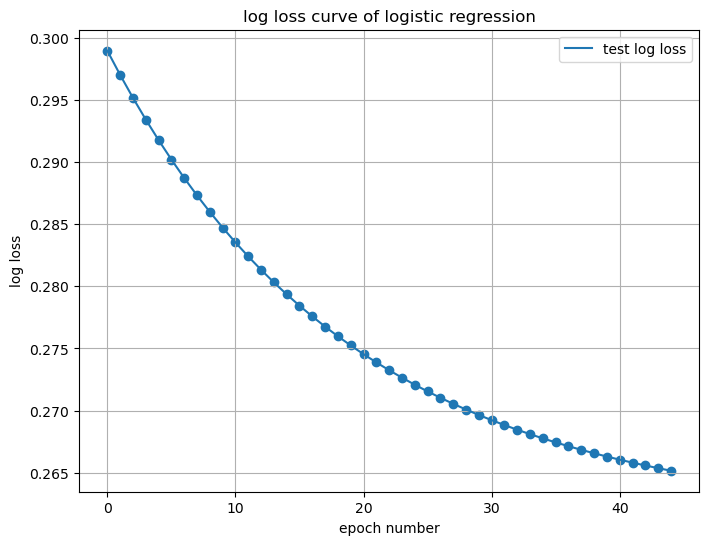

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epo,loss, label='test log loss')
plt.scatter(epo,loss)
plt.title('log loss curve of logistic regression')
plt.xlabel('epoch number')
plt.ylabel("log loss")
plt.legend()

In [81]:
ftest=decision_function(x_test,gamma)[0]

In [82]:
ftest

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [83]:
def probability(ftest,w,b):
    p=1/(1+np.exp(-w*ftest+b)) # to calculate probilty P(Y=1|X)
    return p

In [84]:
prob=probability(ftest,we,be)
print(prob[:10])

[0.63605756 0.60161176 0.63605756 0.60161176 0.63605756 0.60161176
 0.63605756 0.60161176 0.63605756 0.60161176]


__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
